In [2]:
#===================================================================================================
#                               SEDOGBO Sosthène Junior
#                                          TD2
# ********************************************README*************************************************
# Mon code de réseau de neurones propement dit se trouve dans le fichier my_ai_utils.py
# Dans ce fichier, se trouve 2 classes: Dense et NetModel
# La fonction de backpropagation est définie dans la classe NetModel
# Le fichier iris_project.ipynb est un notebook qui facilite l'exécution et la visualisation du code
#======================================================================================================

from my_ai_utils import *

In [3]:
df = pd.read_csv("iris.data.csv", header=None, names=['sepal_length', 'sepal_width',
                                          'petal_length', 'petal_width', 'category'])
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\Junior\AppData\Local\Temp\ipykernel_32200\3486867515.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


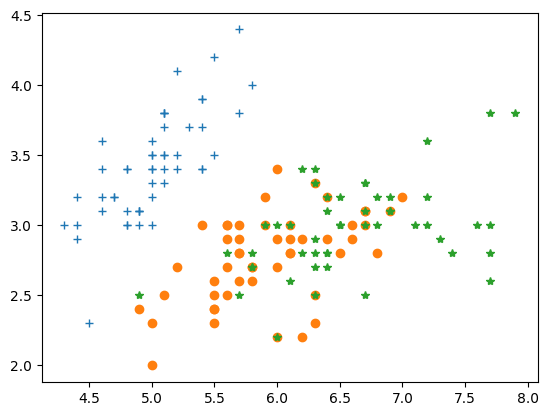

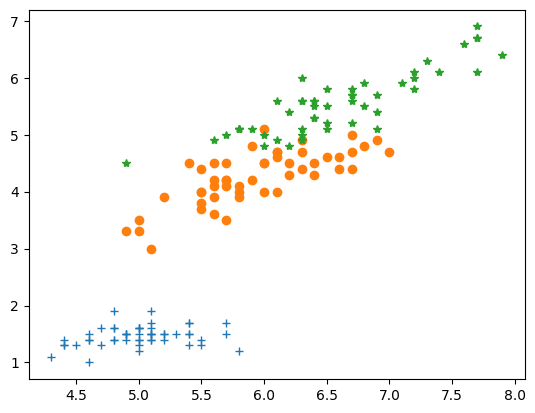

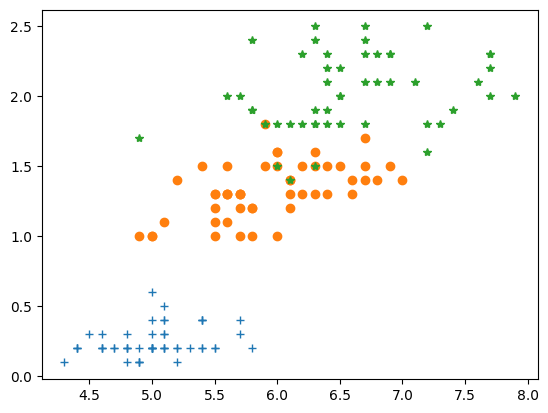

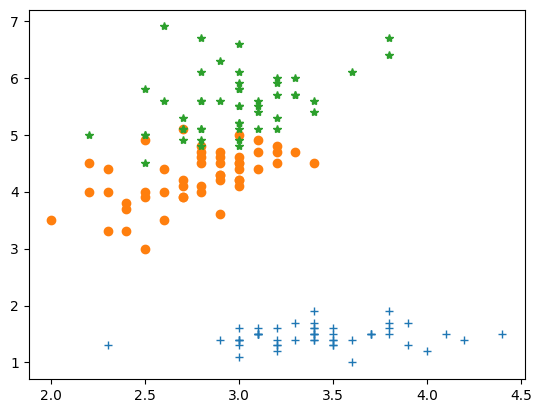

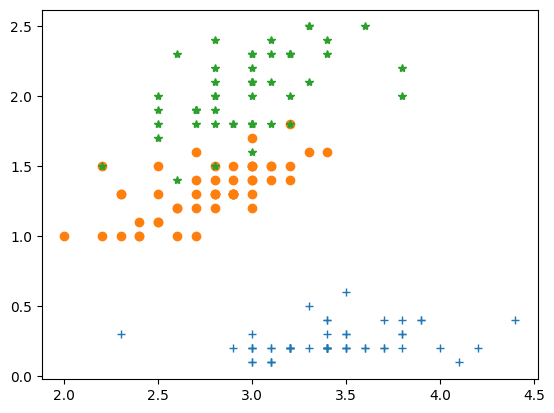

In [4]:
#===========================================
# Visualisation du dataset
#===========================================
real_set = np.array(df)
size = len(real_set)
for e in range(0, 2):
    for j in range(1, 4):
        if e != j:
            category1 = np.array([(real_set[:, e][i], real_set[:, j][i]) for i in range(size) if real_set[:, -1][i] == "Iris-setosa"])
            category2 = np.array([(real_set[:, e][i], real_set[:, j][i]) for i in range(size) if real_set[:, -1][i] == "Iris-versicolor"])
            category3 = np.array([(real_set[:, e][i], real_set[:, j][i]) for i in range(size) if real_set[:, -1][i] == "Iris-virginica"])

            f = plt.figure()
            plt.plot(category1[:, 0], category1[:, 1], '+')
            plt.plot(category2[:, 0], category2[:, 1], 'o')
            plt.plot(category3[:, 0], category3[:, 1], '*')

            f.show()


In [19]:
#===========================================
# Création puis Entrainement puis Test du modèle
#===========================================
real_set = np.array(pd.read_csv("iris.data.csv"))
np.random.shuffle(real_set)

size = len(real_set)
X_set = real_set[:,:-1]
Y_set = real_set[:,-1]

train_and_validation_size = int(size*(70+15)/100)
_train_and_validation_set = X_set[:train_and_validation_size, :]
_train_and_validation_y = Y_set[:train_and_validation_size]

_test_set = X_set[train_and_validation_size: , :]
_test_y = Y_set[train_and_validation_size:]

Epoch 0:  Loss is 0.7456435026990126 
Epoch 1:  Loss is 0.6994546933332801 
Epoch 2:  Loss is 0.6774183541028438 
Epoch 3:  Loss is 0.6675740079779662 
Epoch 4:  Loss is 0.6624478850034096 
Epoch 5:  Loss is 0.6588533034386092 
Epoch 6:  Loss is 0.655598478133734 
Epoch 7:  Loss is 0.6522227486473102 
Epoch 8:  Loss is 0.6485230261763848 
Epoch 9:  Loss is 0.6444001793230956 
Epoch 10:  Loss is 0.6398115298696825 
Epoch 11:  Loss is 0.6347524932546164 
Epoch 12:  Loss is 0.6292434703769759 
Epoch 13:  Loss is 0.6233182375788308 
Epoch 14:  Loss is 0.6170158456946293 
Epoch 15:  Loss is 0.6103769468360887 
Epoch 16:  Loss is 0.6034432113873953 
Epoch 17:  Loss is 0.5962578941128135 
Epoch 18:  Loss is 0.5888662960134265 
Epoch 19:  Loss is 0.5813156796417522 
Epoch 20:  Loss is 0.5736546479854348 
Epoch 21:  Loss is 0.5659321557622013 
Epoch 22:  Loss is 0.5581963438932964 
Epoch 23:  Loss is 0.5504933613244682 
Epoch 24:  Loss is 0.542866297681261 
Epoch 25:  Loss is 0.535354308388033 

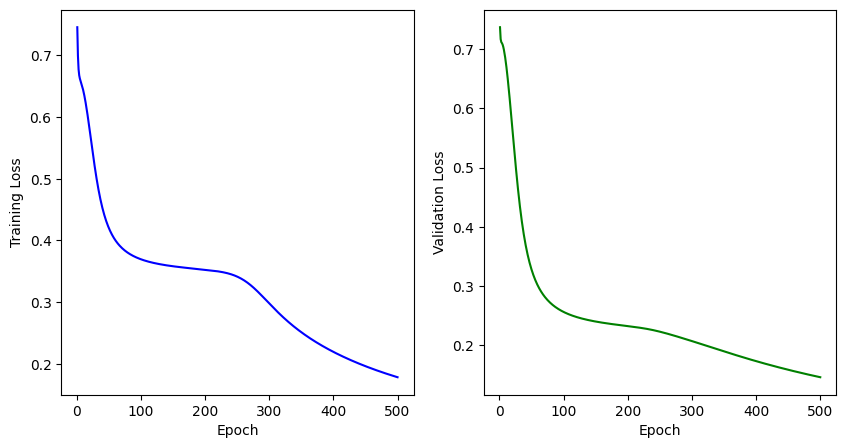

 
Your model accuracy is  100.0% on this dataset 
 


In [46]:
#===========================================
#  Training
#===========================================
iris_model = NetModel(input_shape=(4, ), usage="MultiClassification")
iris_model.add_layer(Dense(4, activation_function="sigmoid"))
iris_model.compile(3, categories=['Iris-setosa','Iris-versicolor', 'Iris-virginica'], output_function="softmax", initializer="xavier")
iris_model.train(_train_and_validation_set, _train_and_validation_y,"quadratic", nepochs= 500, learning_rate=0.01, validation_per=15/(70+15))
iris_model.display_losses()
z = iris_model.predict_sample(_test_set,_test_y, metric="accuracy")

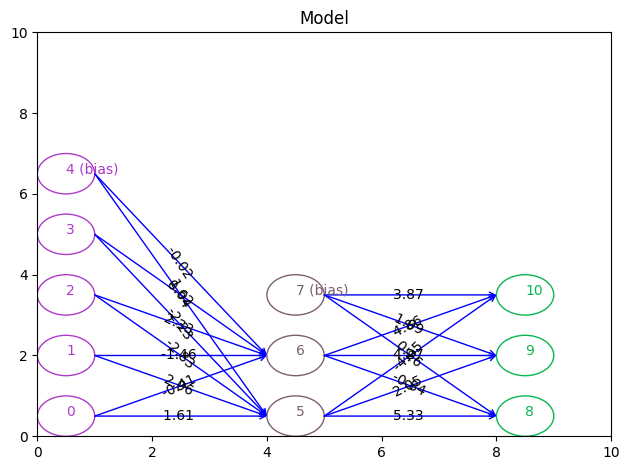

 
Your model accuracy is  100.0% on this dataset 
 


In [47]:
#===========================================
# Mon meilleur modèle: 100% de précision avec une erreur < 0.05
#===========================================
best_model = load("./perfectmodel")
best_model.draw()
a = best_model.predict_sample(_test_set,_test_y )